## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
import re
import spacy
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Read Datasets

In [3]:
fake = pd.read_csv(r"C:\Users\apoor\Downloads\drive-download-20230728T152315Z-001\Fake.csv",encoding='ISO-8859-1')
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
true = pd.read_csv(r"C:\Users\apoor\Downloads\drive-download-20230728T152315Z-001\True.csv", encoding='ISO-8859-1', error_bad_lines=False)
true.head()

b'Skipping line 11067: expected 4 fields, saw 8\n'


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21416, 4)

# EDA

In [7]:
fake.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

In [8]:
true.describe()

title  \
count                                               21416   
unique                                              20825   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21416         21416   
unique                                              21191             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11271   

                      date  
count                21416  
unique                 716  
top     December 20, 2017   
freq                   182

In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [11]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [14]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [15]:
# Adding new column to distribute Fake and Real news

# fake news represented by '0'
# true news represented by '1'

fake['target'] = '0'
true['target'] = '1'

In [16]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0

In [17]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date target  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [18]:
# Resetting index

df = pd.concat([fake,true]).reset_index(drop = True)
df.shape

(44897, 5)

In [19]:
df.duplicated().sum()

209

In [20]:
df.drop_duplicates()

title  \
0       Donald Trump Sends Out Embarrassing New Year...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obamas Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44892  'Fully committed' NATO backs new U.S. approach...   
44893  LexisNexis withdrew two products from Chinese ...   
44894  Minsk cultural hub becomes haven from authorities   
44895  Vatican upbeat on possibility of Pope Francis ...   
44896  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
44892  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44893  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44894  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44895  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44896  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date target  
0      December 31, 2017      0  
1      December 31, 2017      0  
2      December 30, 2017      0  
3      December 29, 2017      0  
4      December 25, 2017      0  
...                  ...    ...  
44892   August 22, 2017       1  
44893   August 22, 2017       1  
44894   August 22, 2017       1  
44895   August 22, 2017       1  
44896   August 22, 2017       1  

[44688 rows x 5 columns]

In [21]:
#Shuffling the data

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop = True)

In [55]:
df.head(10)

title  \
0   Lawyers Trump Used To Prove He Has No Russi...   
1  BOOM! Companies That Openly Criticized Trump F...   
2  Turkey, Iran agree to discuss Russia's Syrian ...   
3  Shot North Korean defector suffered massive in...   
4  Russian bombers hit Islamic State targets in S...   
5  White House urges ban on non-compete agreement...   
6   Former Swedish Prime Minister BRUTALLY Mocks ...   
7   Donald Trump Cant Even Control His Temper In...   
8  Clinton: 'We respect the choice the people' ma...   
9  BREAKING NEWS: Senator John McCain Diagnosed W...   

                                                text       subject  \
0  It was the tweet that blew up the internet:BRE...          News   
1  Among the high profile companies opposing Trum...     left-news   
2  ASTANA (Reuters) - Turkey and Iran have agreed...     worldnews   
3  SEOUL (Reuters) - The North Korean soldier who...     worldnews   
4  MOSCOW (Reuters) - Russia s Defence Ministry s...     worldnews   
5  (Reuters) - The Obama administration on Tuesda...  politicsNews   
6  Donald Trump s buffonery, lies, and unhinged a...          News   
7  In a meeting about  party unity,  Donald Trump...          News   
8  WASHINGTON (Reuters) - Democratic presidential...  politicsNews   
9  The McCain family has requested everyone s pra...      politics   

                 date target  
0        May 12, 2017      0  
1        Jan 31, 2017      0  
2   October 31, 2017       1  
3  November 15, 2017       1  
4  November 24, 2017       1  
5   October 25, 2016       1  
6   February 19, 2017      0  
7        July 7, 2016      0  
8      June 24, 2016       1  
9        Jul 19, 2017      0

# Visualization

<AxesSubplot:ylabel='subject'>

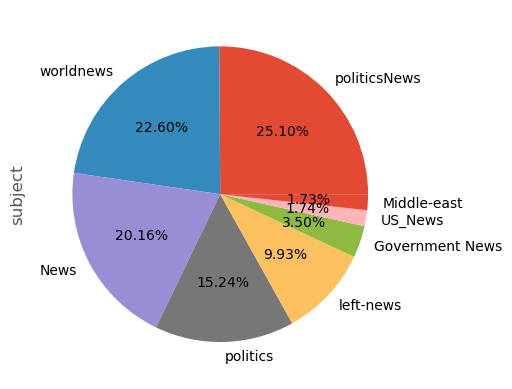

In [56]:
df['subject'].value_counts().plot(kind='pie',autopct='%0.02f%%')

<AxesSubplot:xlabel='target', ylabel='count'>

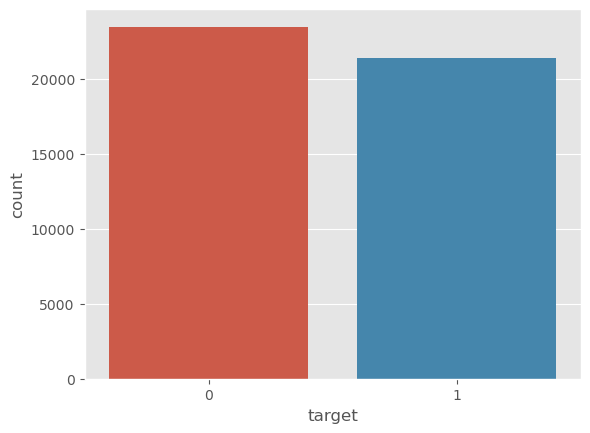

In [57]:
sns.countplot(df['target'])

In [58]:
def worldcloud(data, label):
    txt = ' '.join(data['text'])
    plt.figure(figsize=(20,20))
    wc = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=200,width=1500, height=700).generate(txt)
    plt.imshow(wc,interpolation = 'blackman')
    plt.title(label)
    #plt.axis('off')

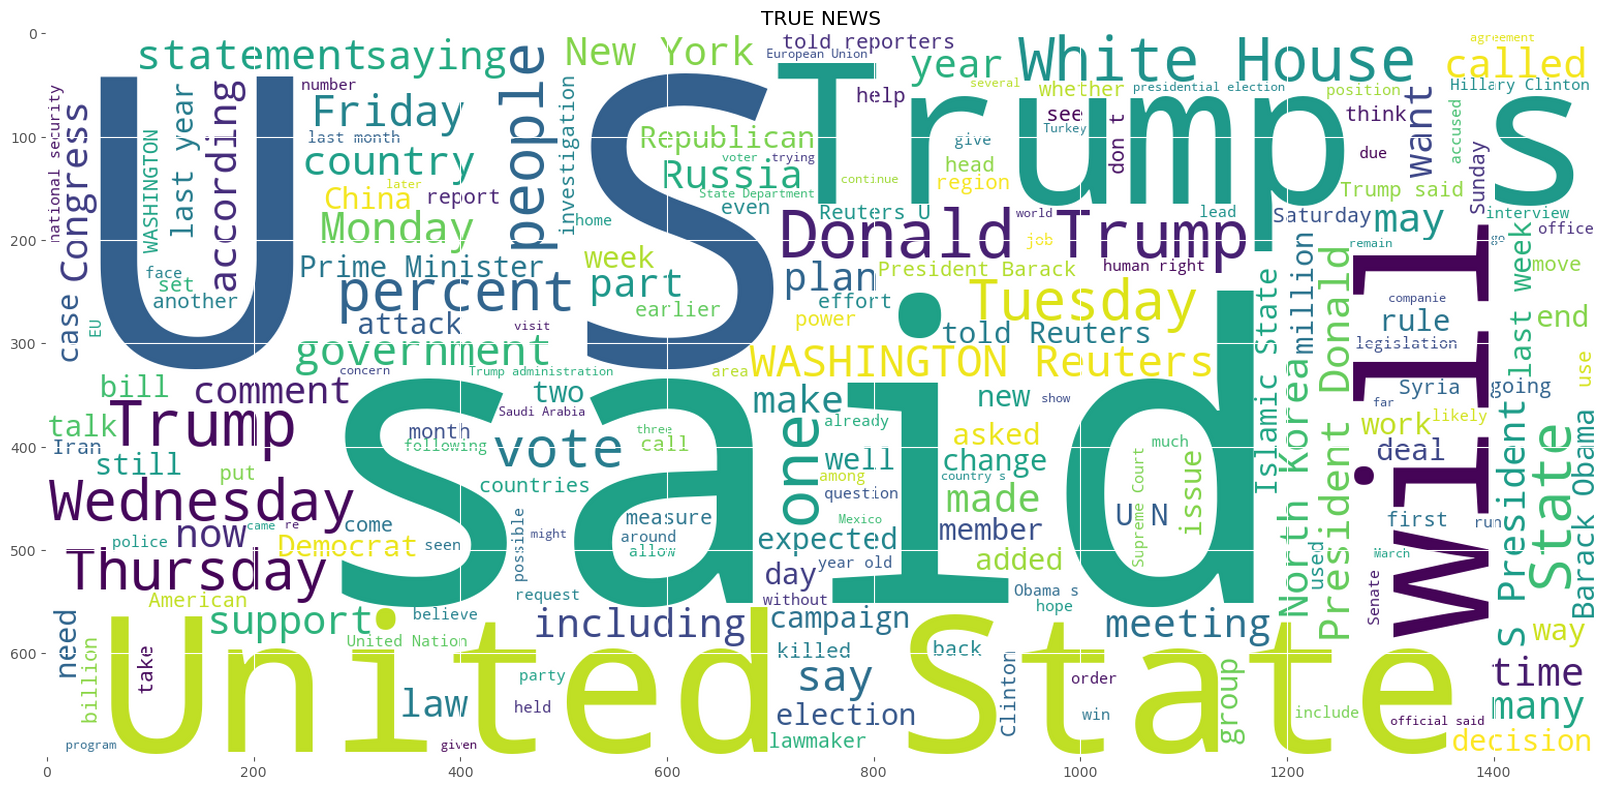

In [59]:
worldcloud(true,'TRUE NEWS')

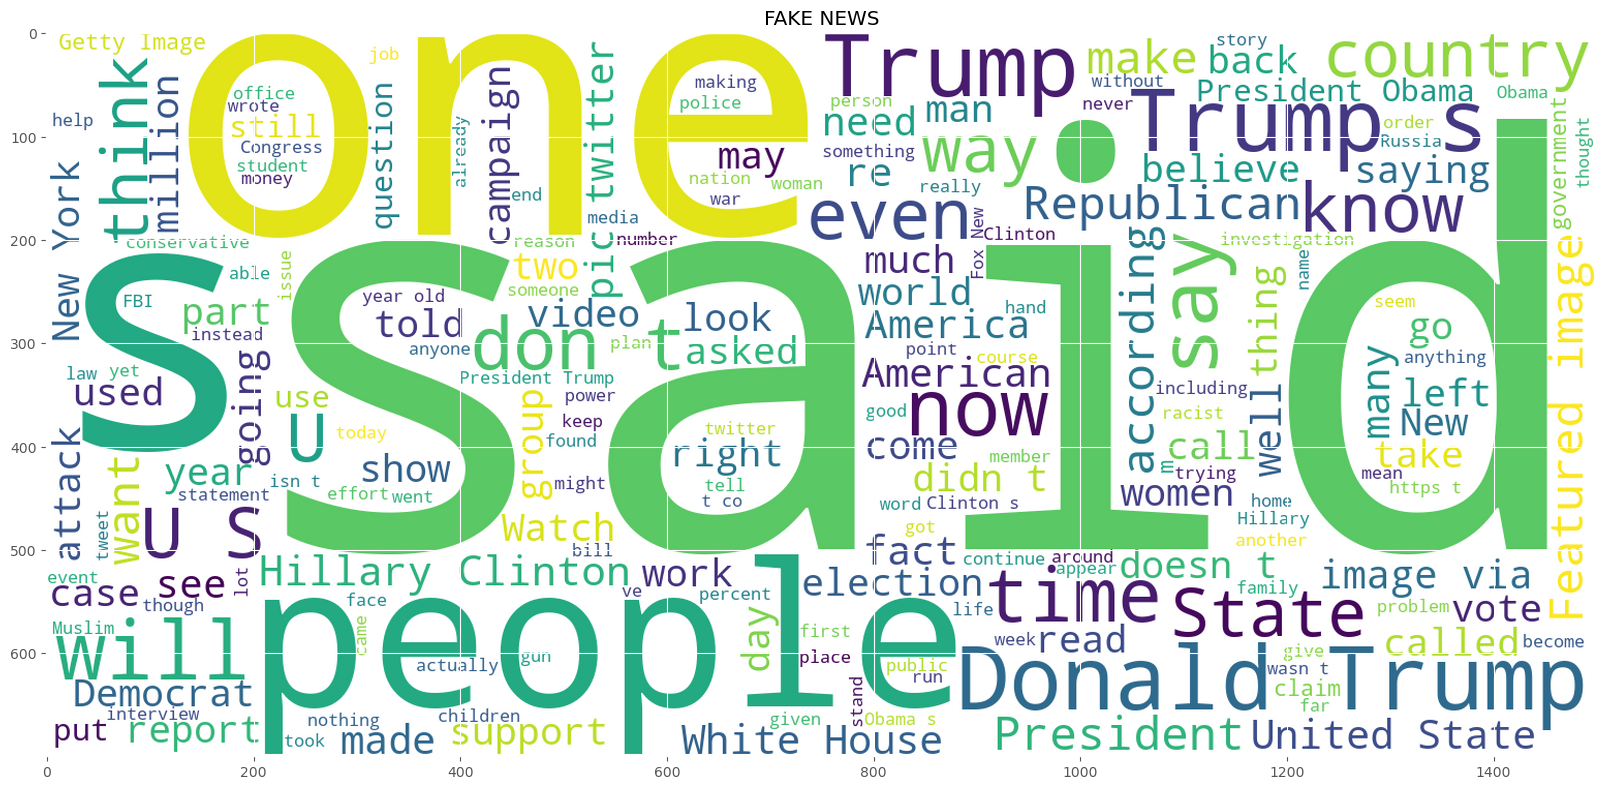

In [60]:
worldcloud(fake,'FAKE NEWS')

# Heatmap

In [61]:
data_top10 = df.iloc[1:3,:]

In [62]:
data_top10 = data_top10.drop(columns=['subject','date'])

In [63]:
data_top10

title  \
1  BOOM! Companies That Openly Criticized Trump F...   
2  Turkey, Iran agree to discuss Russia's Syrian ...   

                                                text target  
1  Among the high profile companies opposing Trum...      0  
2  ASTANA (Reuters) - Turkey and Iran have agreed...      1

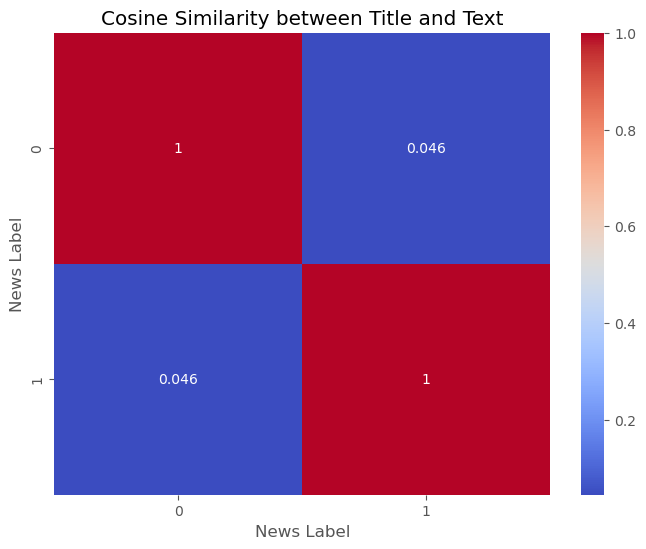

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Data Preprocessing
data_top10['title'] = data_top10['title'].str.lower()
data_top10['text'] = data_top10['text'].str.lower()

# Step 2: Feature Extraction (Using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_top10['title'] + ' ' + data_top10['text'])

# Step 3: Compute Similarity Score
cosine_sim = cosine_similarity(tfidf_matrix)

# Step 4: Create Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', xticklabels=data_top10['target'], yticklabels=data_top10['target'])
plt.xlabel('News Label')
plt.ylabel('News Label')
plt.title('Cosine Similarity between Title and Text')
plt.show()

In [65]:
df.head()

title  \
0   Lawyers Trump Used To Prove He Has No Russi...   
1  BOOM! Companies That Openly Criticized Trump F...   
2  Turkey, Iran agree to discuss Russia's Syrian ...   
3  Shot North Korean defector suffered massive in...   
4  Russian bombers hit Islamic State targets in S...   

                                                text    subject  \
0  It was the tweet that blew up the internet:BRE...       News   
1  Among the high profile companies opposing Trum...  left-news   
2  ASTANA (Reuters) - Turkey and Iran have agreed...  worldnews   
3  SEOUL (Reuters) - The North Korean soldier who...  worldnews   
4  MOSCOW (Reuters) - Russia s Defence Ministry s...  worldnews   

                 date target  
0        May 12, 2017      0  
1        Jan 31, 2017      0  
2   October 31, 2017       1  
3  November 15, 2017       1  
4  November 24, 2017       1

In [66]:
from datetime import datetime

corrected_dates = []
for date_str in df['date']:
    try:
        # Attempt to parse the date using the correct format
        parsed_date = datetime.strptime(date_str, '%B %d, %Y')
        # If parsing is successful, convert the date to the desired format
        corrected_date_str = parsed_date.strftime('%Y-%m-%d')
    except ValueError:
        # If parsing fails, you can add specific correction logic here or simply leave it as is
        corrected_date_str = date_str

    # Appending the corrected date to the list
    corrected_dates.append(corrected_date_str)

# Update the 'date' column with the corrected dates
df['date'] = corrected_dates

In [67]:
data = df.iloc[:100,:]
data

title  \
0    Lawyers Trump Used To Prove He Has No Russi...   
1   BOOM! Companies That Openly Criticized Trump F...   
2   Turkey, Iran agree to discuss Russia's Syrian ...   
3   Shot North Korean defector suffered massive in...   
4   Russian bombers hit Islamic State targets in S...   
..                                                ...   
95  Trump says he had 'very good' call with Mexico...   
96  Iowa governor urges caucus-goers to say 'No' t...   
97  Texas governor approves adoption bill that cri...   
98  WATCH: The Views JOY BEHAR Wants To Know 
Wha...   
99  House rejects bill requiring carriers to share...   

                                                 text       subject  \
0   It was the tweet that blew up the internet:BRE...          News   
1   Among the high profile companies opposing Trum...     left-news   
2   ASTANA (Reuters) - Turkey and Iran have agreed...     worldnews   
3   SEOUL (Reuters) - The North Korean soldier who...     worldnews   
4   MOSCOW (Reuters) - Russia s Defence Ministry s...     worldnews   
..                                                ...           ...   
95  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
96  ALTOONA, Iowa (Reuters) - Iowas governor said...  politicsNews   
97  AUSTIN, Texas (Reuters) - The Texas governor s...  politicsNews   
98  After reporter and model, Leeann Tweeden accus...     left-news   
99  WASHINGTON (Reuters) - The U.S. House of Repre...  politicsNews   

                  date target  
0           2017-05-12      0  
1         Jan 31, 2017      0  
2    October 31, 2017       1  
3   November 15, 2017       1  
4   November 24, 2017       1  
..                 ...    ...  
95   January 27, 2017       1  
96   January 19, 2016       1  
97      June 15, 2017       1  
98        Nov 16, 2017      0  
99       May 24, 2016       1  

[100 rows x 5 columns]

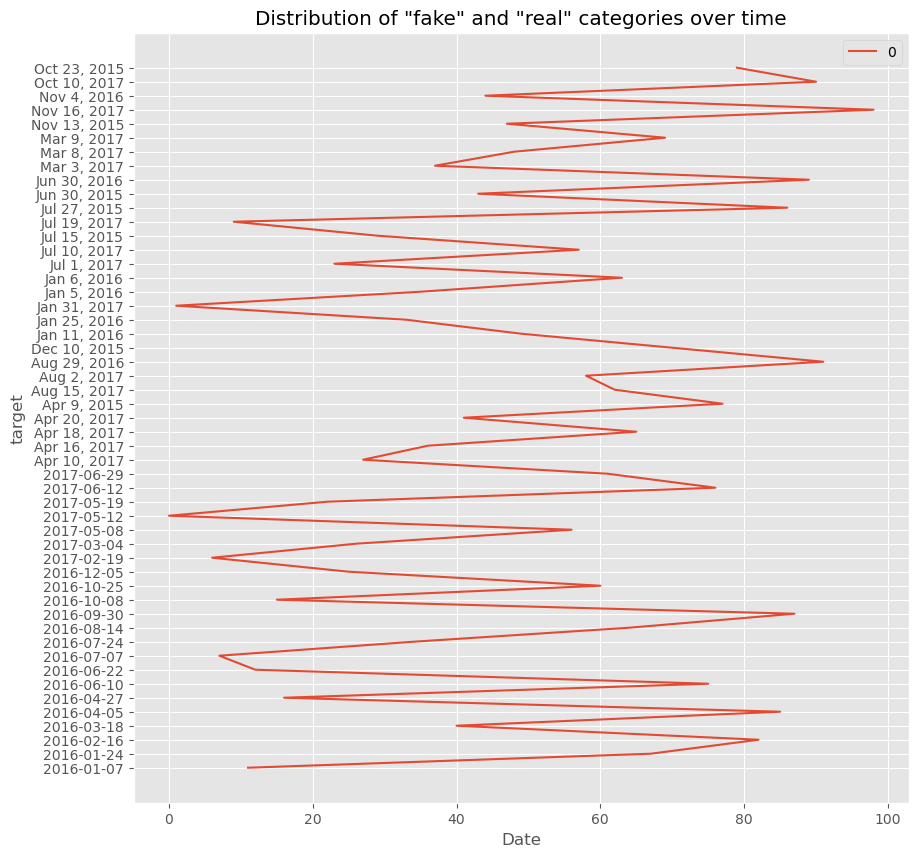

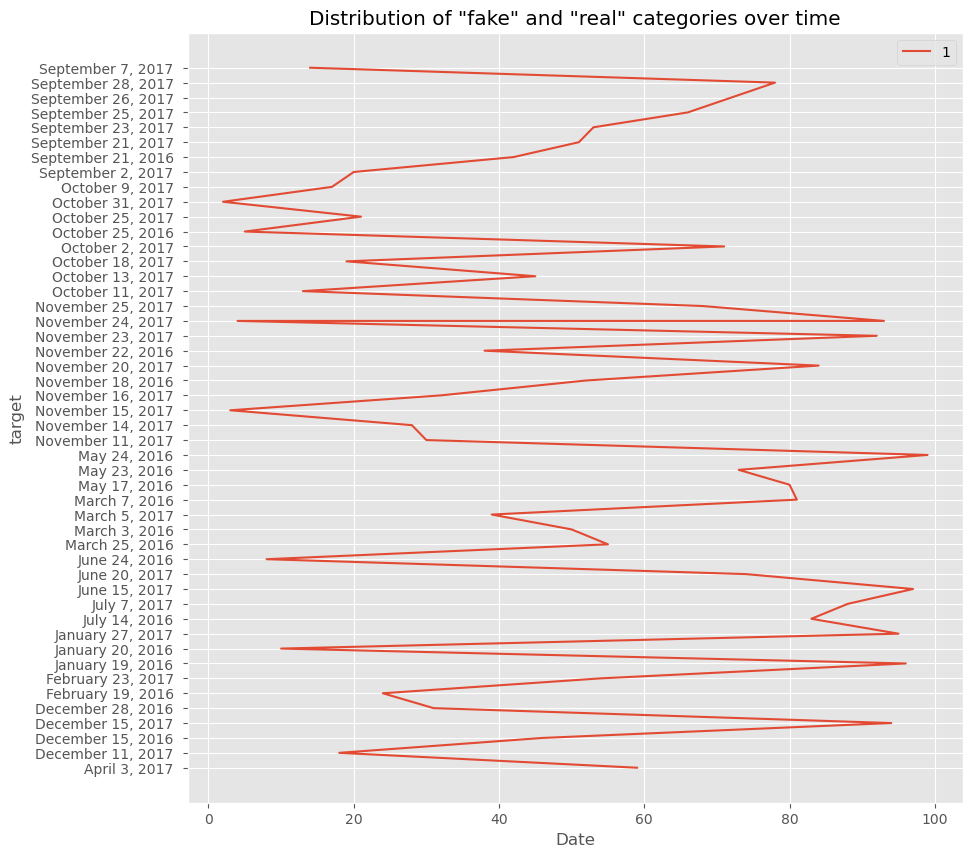

In [68]:
# Convert the 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'], format="%B %d, %Y",errors='ignore')  # Specify the format

# Sort the DataFrame by date
data.sort_values(by='date', inplace=True)

# Group the data by category
grouped_data = data.groupby('target')

# Create a line plot for each category
for target, group in grouped_data:
    plt.figure(figsize=(10,10))
    plt.plot( group.index, group['date'], label=target)
    plt.xlabel('Date')
    plt.ylabel('target')
    plt.title('Distribution of "fake" and "real" categories over time')
    plt.legend()
    plt.show()

# Emotion mining

In [69]:
data1 = df.iloc[:100,1:2]

In [70]:
data1

text
0   It was the tweet that blew up the internet:BRE...
1   Among the high profile companies opposing Trum...
2   ASTANA (Reuters) - Turkey and Iran have agreed...
3   SEOUL (Reuters) - The North Korean soldier who...
4   MOSCOW (Reuters) - Russia s Defence Ministry s...
..                                                ...
95  WASHINGTON (Reuters) - U.S. President Donald T...
96  ALTOONA, Iowa (Reuters) - Iowas governor said...
97  AUSTIN, Texas (Reuters) - The Texas governor s...
98  After reporter and model, Leeann Tweeden accus...
99  WASHINGTON (Reuters) - The U.S. House of Repre...

[100 rows x 1 columns]

In [71]:
txt = ' '.join(data1['text'])

In [72]:
affin = pd.read_csv('Afinn.csv', encoding='latin-1')

In [73]:
txt

'It was the tweet that blew up the internet:BREAKING: Trump lawyer: Tax returns from past 10 years show no "income of any type from Russian sources," with few exceptions.  The Associated Press (@AP) May 12, 2017The headscratching claim by Trump s lawyers was that he had  no income of any type  from Russia  with few exceptions.The exceptions cited don t raise many eyebrows. What is noticeably absent is any mention of the Russia megadonors Eric Trump recently bragged helped finance Trump s golf resort, leading one to assume that there are things being intentionally left out of this report. (Eric Trump now denies making this admission, unfortunately Eric has been known to lie before.)The follow up story published by the Associated Press was even more bizarre (emphasis added).President Donald Trump s lawyers say a review of his last 10 years of tax returns do not reflect  any income of any type from Russian sources,  with some exceptions.The lawyers did not release copies of Trump s tax re

In [74]:
#Converting text into paragraph using sent_tokenize
sent = sent_tokenize(txt)
sent

['It was the tweet that blew up the internet:BREAKING: Trump lawyer: Tax returns from past 10 years show no "income of any type from Russian sources," with few exceptions.',
 'The Associated Press (@AP) May 12, 2017The headscratching claim by Trump s lawyers was that he had  no income of any type  from Russia  with few exceptions.The exceptions cited don t raise many eyebrows.',
 'What is noticeably absent is any mention of the Russia megadonors Eric Trump recently bragged helped finance Trump s golf resort, leading one to assume that there are things being intentionally left out of this report.',
 '(Eric Trump now denies making this admission, unfortunately Eric has been known to lie before.',
 ')The follow up story published by the Associated Press was even more bizarre (emphasis added).President Donald Trump s lawyers say a review of his last 10 years of tax returns do not reflect  any income of any type from Russian sources,  with some exceptions.The lawyers did not release copies 

In [75]:
sent = pd.DataFrame(sent, columns=['Sentences'])
sent

Sentences
0     It was the tweet that blew up the internet:BRE...
1     The Associated Press (@AP) May 12, 2017The hea...
2     What is noticeably absent is any mention of th...
3     (Eric Trump now denies making this admission, ...
4     )The follow up story published by the Associat...
...                                                 ...
1417  Smith was found murdered four days later only ...
1418  While Im disappointed in tonights outcome, I...
1419                         Yoder said in a statement.
1420  Smiths parents were in attendance in the Hous...
1421  More than 20 states have already adopted versi...

[1422 rows x 1 columns]

In [76]:
#Affin score
affin.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [77]:
score = affin.set_index('word')['value'].to_dict() #converting into dictionary
score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [78]:
score.get('happy')

3

In [79]:
#adding all the values of words in the sentances

#sentiment calculationn funtion

nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [80]:
def calculate_sentiment(text):
    sent_score=0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score=sent_score+score.get(word.lemma_,0)
    return sent_score

In [81]:
calculate_sentiment('Nature is beautiful')

3

In [82]:
sent['Emotion'] = sent['Sentences'].apply(calculate_sentiment)

In [83]:
sent[sent['Emotion']>0]

Sentences  Emotion
2     What is noticeably absent is any mention of th...        1
5     But they won t let reporters independently ver...        4
10    It does so much business in Russia, in fact, t...        3
12    Morgan Lewis & Bockius is one of the biggest &...        1
14    Something worth thinking about: This group   w...        3
...                                                 ...      ...
1400  Tweeden also shared a photo of Franken grabbin...        1
1406  He was a very funny comedian at this time, he ...       10
1408  It took all of 1 second for not funny  comedia...        4
1413  The rejection was considered surprising, as Ho...        2
1414  However, Civil liberties groups aggressively o...        1

[441 rows x 2 columns]

In [84]:
sent[sent['Emotion']==0]

Sentences  Emotion
6     So we just have to take their word for it If t...        0
7     Instead, Trump got one that has even more conn...        0
8     does.The lawyers Trump turned to work for a fi...        0
9                  It does a lot of business in Russia.        0
17          But the letter they sent is two months old.        0
...                                                 ...      ...
1412  Lawmakers voted 229-158 to pass the Kelsey Smi...        0
1415  R Street, a libertarian-leaning think tank, sa...        0
1417  Smith was found murdered four days later only ...        0
1419                         Yoder said in a statement.        0
1420  Smiths parents were in attendance in the Hous...        0

[490 rows x 2 columns]

In [85]:
sent[sent['Emotion']<0]

Sentences  Emotion
0     It was the tweet that blew up the internet:BRE...       -1
1     The Associated Press (@AP) May 12, 2017The hea...       -1
3     (Eric Trump now denies making this admission, ...       -2
4     )The follow up story published by the Associat...       -2
11    It s a global company, of course it would be i...       -3
...                                                 ...      ...
1407  Shortly after rabid, leftist, co-host, Sonny H...       -2
1411  WASHINGTON (Reuters) - The U.S. House of Repre...       -4
1416  The bill is named after a deceased 18-year-old...       -1
1418  While Im disappointed in tonights outcome, I...       -2
1421  More than 20 states have already adopted versi...       -1

[491 rows x 2 columns]

In [86]:
sent.describe()

Emotion
count  1422.000000
mean     -0.207454
std       3.003376
min     -25.000000
25%      -2.000000
50%       0.000000
75%       1.000000
max      26.000000

In [87]:
sent['Length'] = sent['Sentences'].apply(len)
sent

Sentences  Emotion  Length
0     It was the tweet that blew up the internet:BRE...       -1     169
1     The Associated Press (@AP) May 12, 2017The hea...       -1     203
2     What is noticeably absent is any mention of th...        1     218
3     (Eric Trump now denies making this admission, ...       -2      94
4     )The follow up story published by the Associat...       -2     509
...                                                 ...      ...     ...
1417  Smith was found murdered four days later only ...        0     221
1418  While Im disappointed in tonights outcome, I...       -2     156
1419                         Yoder said in a statement.        0      26
1420  Smiths parents were in attendance in the Hous...        0     101
1421  More than 20 states have already adopted versi...       -1      81

[1422 rows x 3 columns]

<AxesSubplot:xlabel='Emotion', ylabel='Length'>

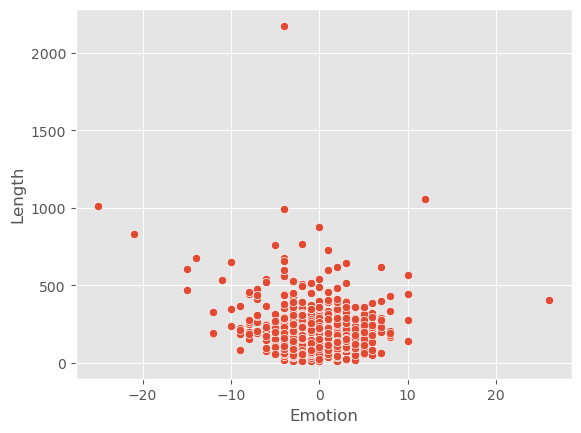

In [88]:
sns.scatterplot(sent['Emotion'],sent['Length'])

# NER

In [89]:
data = df.iloc[:1000, :2]

In [90]:
# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Combine title and text columns (if needed)
data["full_text"] = data["title"] + " " + data["text"]

# Create a list to store named entities for each text
ner_results = []

# Process each text in the dataset
for text in data["full_text"]:
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_results.append(entities)

# Add the NER results back to the DataFrame
data["ner_results"] = ner_results

# Display the DataFrame with NER results
print(data.head())

                                               title  \
0   Lawyers Trump Used To Prove He Has No Russi...   
1  BOOM! Companies That Openly Criticized Trump F...   
2  Turkey, Iran agree to discuss Russia's Syrian ...   
3  Shot North Korean defector suffered massive in...   
4  Russian bombers hit Islamic State targets in S...   

                                                text  \
0  It was the tweet that blew up the internet:BRE...   
1  Among the high profile companies opposing Trum...   
2  ASTANA (Reuters) - Turkey and Iran have agreed...   
3  SEOUL (Reuters) - The North Korean soldier who...   
4  MOSCOW (Reuters) - Russia s Defence Ministry s...   

                                           full_text  \
0   Lawyers Trump Used To Prove He Has No Russi...   
1  BOOM! Companies That Openly Criticized Trump F...   
2  Turkey, Iran agree to discuss Russia's Syrian ...   
3  Shot North Korean defector suffered massive in...   
4  Russian bombers hit Islamic State targets i

In [91]:
data = pd.DataFrame(data)
data

title  \
0     Lawyers Trump Used To Prove He Has No Russi...   
1    BOOM! Companies That Openly Criticized Trump F...   
2    Turkey, Iran agree to discuss Russia's Syrian ...   
3    Shot North Korean defector suffered massive in...   
4    Russian bombers hit Islamic State targets in S...   
..                                                 ...   
995   The Rolling Stones Are DONE With Trump Using ...   
996  WHOA! Medical Expert Watching Debate Exposes A...   
997  BREAKING: MORE HACKED E-MAILS From DNC Release...   
998   Trump Just Got DESTROYED By One Of Americas ...   
999   BREAKING: Michael Flynn CRACKS  Will Testify...   

                                                  text  \
0    It was the tweet that blew up the internet:BRE...   
1    Among the high profile companies opposing Trum...   
2    ASTANA (Reuters) - Turkey and Iran have agreed...   
3    SEOUL (Reuters) - The North Korean soldier who...   
4    MOSCOW (Reuters) - Russia s Defence Ministry s...   
..                                                 ...   
995  The Rolling Stones are now on a growing list o...   
996  How many more symptoms need to be uncovered be...   
997  It s not the first time that the name of Vladi...   
998  One of America s most legendary journalists, D...   
999  Michael Flynn, Trump s embattled former nation...   

                                             full_text  \
0     Lawyers Trump Used To Prove He Has No Russi...   
1    BOOM! Companies That Openly Criticized Trump F...   
2    Turkey, Iran agree to discuss Russia's Syrian ...   
3    Shot North Korean defector suffered massive in...   
4    Russian bombers hit Islamic State targets in S...   
..                                                 ...   
995   The Rolling Stones Are DONE With Trump Using ...   
996  WHOA! Medical Expert Watching Debate Exposes A...   
997  BREAKING: MORE HACKED E-MAILS From DNC Release...   
998   Trump Just Got DESTROYED By One Of Americas ...   
999   BREAKING: Michael Flynn CRACKS  Will Testify...   

                                           ner_results  
0    [(2016, DATE), (past 10 years, DATE), (Russian...  
1    [(Trump, ORG), (seven, CARDINAL), (Muslim, NOR...  
2    [(Turkey, GPE), (Iran, GPE), (Russia, GPE), (S...  
3    [(Shot North Korean, PERSON), (Reuters, ORG), ...  
4    [(Russian, NORP), (Islamic State, ORG), (Syria...  
..                                                 ...  
995  [(The Rolling Stones Are DONE, ORG), (The Roll...  
996  [(Hillary, PERSON), (Clinton, PERSON), (Clinto...  
997  [(DNC Released, FAC), (first, ORDINAL), (Vladi...  
998  [(One, CARDINAL), (Most Respected Journalists ...  
999  [(Michael Flynn CRACKS, PERSON), (Will Testify...  

[1000 rows x 4 columns]

In [92]:
from spacy import displacy 
displacy.render(nlp(txt), style='ent')

# Data cleaning:
    1.Remove unwanted characters
    2.Text normalization
    3.Tokenization
    4.lemmatization
    5.Join the text

In [22]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
data1 = df.drop(columns=['subject','date'])

In [24]:
data1

title  \
0       Students With Trump Sign March Down Halls Cha...   
1      HERES THE BEST WAY To Silence A Liberal Deman...   
2      Trump will get wake-up call when he takes offi...   
3       Republican Caitlyn Jenner Makes OUTRAGEOUS Cl...   
4      PUTIN Threatens To Release 20,000 
Top Secret
...   
...                                                  ...   
44892  WATCH: LIBERAL San Juan Mayor Sinks To New Low...   
44893  Tillerson calls counterparts from Mexico, Cana...   
44894  Anxious world leaders seek clarity on Trump po...   
44895  RATINGS FOR NBCS Backstabbing Megyn Kelly Are...   
44896   AUDIO: Hannity Has RACIST Meltdown, Wants To ...   

                                                    text target  
0      Racists are all jizzed up after Donald Trump s...      0  
1      Here s a special public service announcement c...      0  
2      WASHINGTON (Reuters) - President-elect Donald ...      1  
3      It s been really hard for the LGBT community t...      0  
4      Putin may be the one person Obama has absolute...      0  
...                                                  ...    ...  
44892  How much longer will the citizens of San Juan,...      0  
44893  WASHINGTON (Reuters) - U.S. Secretary of State...      1  
44894  LONDON (Reuters) - World leaders offered to wo...      1  
44895  Last week, Alex Jones scooped NBC and Megyn Ke...      0  
44896  Nobody would have ever said this about any of ...      0  

[44897 rows x 3 columns]

In [28]:
data1['Joined_column'] = data1['title']+data1['text']
data1

title  \
0       Students With Trump Sign March Down Halls Cha...   
1      HERES THE BEST WAY To Silence A Liberal Deman...   
2      Trump will get wake-up call when he takes offi...   
3       Republican Caitlyn Jenner Makes OUTRAGEOUS Cl...   
4      PUTIN Threatens To Release 20,000 
Top Secret
...   
...                                                  ...   
44892  WATCH: LIBERAL San Juan Mayor Sinks To New Low...   
44893  Tillerson calls counterparts from Mexico, Cana...   
44894  Anxious world leaders seek clarity on Trump po...   
44895  RATINGS FOR NBCS Backstabbing Megyn Kelly Are...   
44896   AUDIO: Hannity Has RACIST Meltdown, Wants To ...   

                                                    text target  \
0      Racists are all jizzed up after Donald Trump s...      0   
1      Here s a special public service announcement c...      0   
2      WASHINGTON (Reuters) - President-elect Donald ...      1   
3      It s been really hard for the LGBT community t...      0   
4      Putin may be the one person Obama has absolute...      0   
...                                                  ...    ...   
44892  How much longer will the citizens of San Juan,...      0   
44893  WASHINGTON (Reuters) - U.S. Secretary of State...      1   
44894  LONDON (Reuters) - World leaders offered to wo...      1   
44895  Last week, Alex Jones scooped NBC and Megyn Ke...      0   
44896  Nobody would have ever said this about any of ...      0   

                                           Joined_column  
0       Students With Trump Sign March Down Halls Cha...  
1      HERES THE BEST WAY To Silence A Liberal Deman...  
2      Trump will get wake-up call when he takes offi...  
3       Republican Caitlyn Jenner Makes OUTRAGEOUS Cl...  
4      PUTIN Threatens To Release 20,000 
Top Secret
...  
...                                                  ...  
44892  WATCH: LIBERAL San Juan Mayor Sinks To New Low...  
44893  Tillerson calls counterparts from Mexico, Cana...  
44894  Anxious world leaders seek clarity on Trump po...  
44895  RATINGS FOR NBCS Backstabbing Megyn Kelly Are...  
44896   AUDIO: Hannity Has RACIST Meltdown, Wants To ...  

[44897 rows x 4 columns]

In [26]:
def preprocess_text(text):
    # Remove special characters, numbers, and convert to lowercase
    text = re.sub(r'\W+', ' ', text).lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Rejoin tokens into cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [29]:
data1['preprocessed_text'] = data1['Joined_column'].apply(preprocess_text)

                                                   title  \
0       Students With Trump Sign March Down Halls Cha...   
1      HERES THE BEST WAY To Silence A Liberal Deman...   
2      Trump will get wake-up call when he takes offi...   
3       Republican Caitlyn Jenner Makes OUTRAGEOUS Cl...   
4      PUTIN Threatens To Release 20,000 Top Secret...   
...                                                  ...   
44892  WATCH: LIBERAL San Juan Mayor Sinks To New Low...   
44893  Tillerson calls counterparts from Mexico, Cana...   
44894  Anxious world leaders seek clarity on Trump po...   
44895  RATINGS FOR NBCS Backstabbing Megyn Kelly Are...   
44896   AUDIO: Hannity Has RACIST Meltdown, Wants To ...   

                                                    text       subject  \
0      Racists are all jizzed up after Donald Trump s...          News   
1      Here s a special public service announcement c...      politics   
2      WASHINGTON (Reuters) - President-elect Donald ... 

In [32]:
data1['preprocessed_text']

0        student trump sign march hall chanting white p...
1        best way silence liberal demanding impeachment...
2        trump get wake call take office obama sayswash...
3        republican caitlyn jenner make outrageous clai...
4        putin threatens release 20 000 top secret emai...
                               ...                        
44892    watch liberal san juan mayor sink new low atta...
44893    tillerson call counterpart mexico canada state...
44894    anxious world leader seek clarity trump polici...
44895    rating nbc backstabbing megyn kelly anti trump...
44896    audio hannity racist meltdown want send presid...
Name: preprocessed_text, Length: 44897, dtype: object

# Feature Extraction:
    1.Binary weight
    2.Bag of words
    3.TF-IDF

In [34]:
series_from_column = data1['preprocessed_text']
series_from_column

0        student trump sign march hall chanting white p...
1        best way silence liberal demanding impeachment...
2        trump get wake call take office obama sayswash...
3        republican caitlyn jenner make outrageous clai...
4        putin threatens release 20 000 top secret emai...
                               ...                        
44892    watch liberal san juan mayor sink new low atta...
44893    tillerson call counterpart mexico canada state...
44894    anxious world leader seek clarity trump polici...
44895    rating nbc backstabbing megyn kelly anti trump...
44896    audio hannity racist meltdown want send presid...
Name: preprocessed_text, Length: 44897, dtype: object

In [36]:
#Binary weight

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
x = cv.fit_transform(series_from_column)

# x is already a sparse matrix, no need to convert it to dense
# You can use the sparse matrix 'x' directly for further processing or modeling


In [49]:
cv = CountVectorizer()
x = cv.fit_transform(series_from_column)
x.toarray()

MemoryError: Unable to allocate 44.2 GiB for an array with shape (44897, 132051) and data type int64

In [38]:
cv.vocabulary_

{'student': 112578,
 'trump': 119709,
 'sign': 107674,
 'march': 73481,
 'hall': 52909,
 'chanting': 25892,
 'white': 127667,
 'power': 92228,
 'video': 124740,
 'racist': 95808,
 'jizzed': 62877,
 'donald': 37936,
 'victory': 124700,
 'sandra': 103292,
 'thompson': 117049,
 'president': 92791,
 'york': 130681,
 'pennsylvania': 89138,
 'naacp': 80299,
 'explained': 43377,
 'facebook': 43778,
 'report': 98941,
 'come': 28862,
 'spit': 110464,
 'attacked': 15135,
 'called': 23580,
 'name': 80529,
 'race': 95726,
 'perceived': 89254,
 'immigrant': 58253,
 'status': 111493,
 'added': 9641,
 'act': 9431,
 'official': 84891,
 'must': 79934,
 'hear': 54126,
 'person': 89520,
 'affected': 10166,
 'witness': 128481,
 'underneath': 121966,
 'post': 91991,
 'man': 73053,
 'left': 69233,
 'vo': 125353,
 'tech': 115583,
 'shouting': 107219,
 'holding': 55875,
 'campaign': 23757,
 'watch': 126567,
 'also': 11882,
 'incident': 58800,
 'reported': 98956,
 'calling': 23622,
 'slave': 108533,
 'parent':

In [47]:
#TF-IDF

tf = TfidfVectorizer()
x = tf.fit_transform(series_from_column)
x= x.toarray()

In [48]:
pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())

<44897x132051 sparse matrix of type '<class 'numpy.float64'>'
	with 7350413 stored elements in Compressed Sparse Row format>

In [ ]:
y = df['target']
y

# Model Building

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
ypred

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

In [ ]:
print('Training Accuarcy: ', nb.score(xtrain,ytrain))
print('Test Accuracy: ',nb.score(xtest,ytest))